In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import experimentos

import importlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import json
importlib.reload(experimentos)

<module 'experimentos' from 'c:\\dev\\Busca Heuristica\\T2-BH\\T2\\experimentos.py'>

# Carregamento

In [2]:
def numpy_to_python(obj):
    '''Converte np.int e np.float para int e float dos dados do dicionário'''
    if isinstance(obj, (np.integer, np.floating)):
        return obj.item()
    
def python_to_numpy(dicionario):
    '''Converte int e float para np.int e np.float dos dados do dicionário'''
    for chave, subdict in dicionario.items():
        for subchave, valor in subdict.items():
            if isinstance(valor, int):
                subdict[subchave] = np.int64(valor)
            elif isinstance(valor, float):
                subdict[subchave] = np.float64(valor)
                
    dicionario = {np.int64(key): valor for key, valor in dicionario.items()}
    return dicionario

In [3]:
# Carrega os experimentos do SA
num_calculos_obj = [5000, 10000, 25000, 50000]

caminho_v1 = 'bkp_resultados_sa/sa_v1_experimentos.json'
with open(caminho_v1, 'r', encoding='utf-8') as arquivo:
    v1 = python_to_numpy(json.load(arquivo))
    v1_resultados = experimentos.experimento(v1, num_calculos_obj)
    v1_resultados.calcula_estatisticas()
    
caminho_v2 = 'bkp_resultados_sa/sa_v2_experimentos.json'
with open(caminho_v2, 'r', encoding='utf-8') as arquivo:
    v2 = python_to_numpy(json.load(arquivo))
    v2_resultados = experimentos.experimento(v2, num_calculos_obj)
    v2_resultados.calcula_estatisticas()
    
caminho_v3 = 'bkp_resultados_sa/sa_v3_experimentos.json'
with open(caminho_v3, 'r', encoding='utf-8') as arquivo:
    v3 = python_to_numpy(json.load(arquivo))
    v3_resultados = experimentos.experimento(v3, num_calculos_obj)
    v3_resultados.calcula_estatisticas()

# Resultados Simulated Annealing

## Comparações numéricas das vizinhanças e métodos com valor de referência

Valor de referência: R$ 32.170.883

$$Eficiência = \frac{VPL_{Médio}}{VPL_{Referência}}$$

In [9]:
def dicionarios_para_dataframe(dicionarios, nomes):
    dados = []
    indices = []
    for nome, dicionario in zip(nomes, dicionarios):
        for num_calculos, metodos in dicionario.items():
            for metodo, valores in metodos.items():
                indices.append((nome, metodo, num_calculos))
                dados.append([valores["media"], valores["maximo"], valores["minimo"]])
    # Criar o DataFrame com índice no formato de tuplas
    df = pd.DataFrame(dados, 
                      index=pd.MultiIndex.from_tuples(indices, names=["Vn", "Metodo", "NumCalculos"]),
                      columns=["Media", "Maximo", "Minimo"])
    
    # Calcular a eficiência (Média / 32170883)
    df["Eficiência"] = df["Media"] / 32170883
    
    # Definir a exibição de números para evitar notação científica
    pd.set_option('display.float_format', '{:,.3f}'.format)
    
    return df


# Criar o DataFrame
dfs = [v1_resultados.estatisticas, v2_resultados.estatisticas, v3_resultados.estatisticas]
nomes = ["Aleatória", "Localizada", "Sistemática"]
df = dicionarios_para_dataframe(dfs, nomes)

# Exibir o DataFrame
df
df.groupby(["Vn", "Metodo", "NumCalculos"]).mean()

Media         Maximo         Minimo  \
Vn          Metodo NumCalculos                                                
Aleatória   mm     5000        30,040,676.400 30,178,566.000 29,774,066.000   
                   10000       30,207,948.867 30,382,263.000 29,962,232.000   
                   25000       30,501,118.600 30,661,607.000 30,292,817.000   
                   50000       30,674,478.600 30,850,030.000 30,473,569.000   
            pm     5000        29,490,630.667 29,879,492.000 28,319,395.000   
                   10000       29,702,874.533 30,065,121.000 28,731,045.000   
                   25000       30,084,722.600 30,279,737.000 29,797,939.000   
                   50000       30,372,816.867 30,502,101.000 30,010,072.000   
Localizada  mm     5000        30,042,966.667 30,200,012.000 29,857,716.000   
                   10000       30,199,344.533 30,454,137.000 29,955,580.000   
                   25000       30,515,102.600 30,757,675.000 30,305,595.000   
                   50000       30,678,820.000 30,900,563.000 30,497,795.000   
            pm     5000        29,230,773.400 29,745,942.000 27,269,936.000   
                   10000       29,737,508.267 29,966,116.000 29,470,906.000   
                   25000       30,071,591.333 30,280,362.000 29,798,045.000   
                   50000       30,357,520.400 30,611,686.000 30,095,666.000   
Sistemática mm     5000        29,974,673.800 30,138,625.000 29,778,854.000   
                   10000       30,151,175.333 30,319,722.000 29,822,695.000   
                   25000       30,464,269.600 30,610,265.000 30,286,819.000   
                   50000       30,584,161.667 30,708,146.000 30,398,402.000   
            pm     5000        30,268,874.067 30,504,373.000 30,095,335.000   
                   10000       30,498,645.933 30,752,997.000 30,319,476.000   
                   25000       30,706,321.200 30,863,340.000 30,512,455.000   
                   50000       30,783,940.467 30,940,915.000 30,582,007.000   

                                Eficiência  
Vn          Metodo NumCalculos              
Aleatória   mm     5000              0.934  
                   10000             0.939  
                   25000             0.948  
                   50000             0.953  
            pm     5000              0.917  
                   10000             0.923  
                   25000             0.935  
                   50000             0.944  
Localizada  mm     5000              0.934  
                   10000             0.939  
                   25000             0.949  
                   50000             0.954  
            pm     5000              0.909  
                   10000             0.924  
                   25000             0.935  
                   50000             0.944  
Sistemática mm     5000              0.932  
                   10000             0.937  
                   25000             0.947  
                   50000             0.951  
            pm     5000              0.941  
                   10000             0.948  
                   25000             0.954  
                   50000             0.957

## Comparação dos métodos MM e PM para cada vizinhança

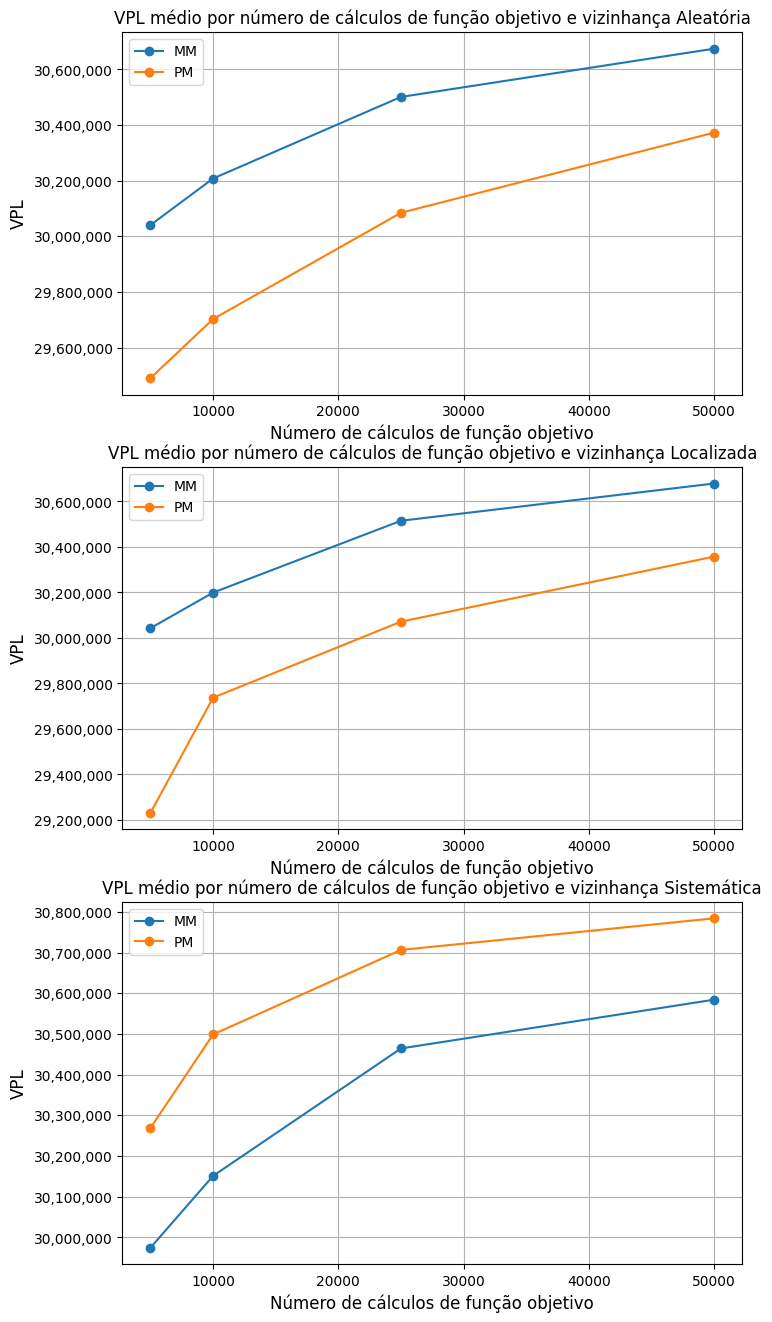

In [5]:
fig, axs = plt.subplots(3,1, figsize=(8,16))
plt.rcParams.update({'font.size': 10})

plt.sca(axs[0])
v1_resultados.plota_experimento(medida='media', vizinhanca='Aleatória')
plt.sca(axs[1])
v2_resultados.plota_experimento(medida='media', vizinhanca='Localizada')
plt.sca(axs[2])
v3_resultados.plota_experimento(medida='media', vizinhanca='Sistemática')

plt.show()

## Comparação do VPL médio das diferentes vizinhanças

**Olhar quem é melhor antes de plotar aqui (MM ou PM)!!!**

In [6]:
# Pega melhor método de cada experimento

v1_mm_media = []
for chave, subdict in v1_resultados.estatisticas.items():
    for subchave, valor in subdict.items():
        if subchave == 'mm':
            v1_mm_media.append(valor.get('media'))
            
v2_mm_media = []
for chave, subdict in v2_resultados.estatisticas.items():
    for subchave, valor in subdict.items():
        if subchave == 'mm':
            v2_mm_media.append(valor.get('media'))
            
v3_pm_media = []
for chave, subdict in v3_resultados.estatisticas.items():
    for subchave, valor in subdict.items():
        if subchave == 'pm':
            v3_pm_media.append(valor.get('media'))

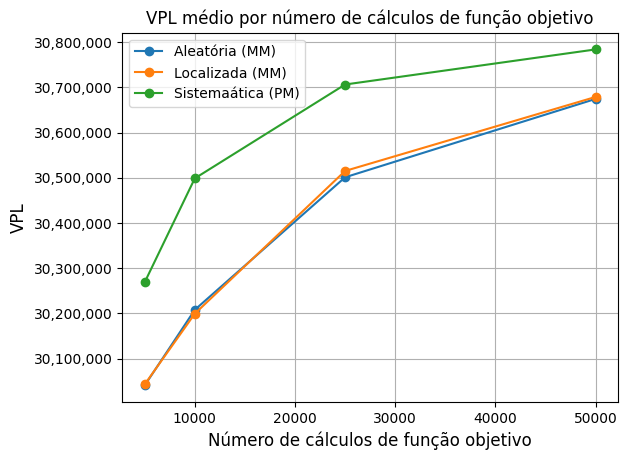

In [7]:
plt.plot(v1_resultados.num_calculos_obj, 
         v1_mm_media, 
         label='Aleatória (MM)', 
         marker='o')
plt.plot(v2_resultados.num_calculos_obj, 
         v2_mm_media, 
         label='Localizada (MM)', 
         marker='o')
plt.plot(v3_resultados.num_calculos_obj, 
         v3_pm_media, 
         label='Sistemaática (PM)', 
         marker='o')

plt.title('VPL médio por número de cálculos de função objetivo')
plt.xlabel('Número de cálculos de função objetivo', fontsize=12)
plt.ylabel('VPL', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.grid()
plt.show()